In [85]:
import pandas as  pd
import numpy as np
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.metrics import roc_curve,auc,recall_score,precision_score,accuracy_score,f1_score
from sklearn.metrics import confusion_matrix,average_precision_score,recall_score
import seaborn as sns

In [2]:
df=pd.read_csv("D:\\Users\\Default User\\Desktop\\Reva Assignments\\HR Analytics\\hranalytics_data.csv",sep='|')

In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spent_company,Work_accident,If employee has left,promotion_last_5years,department,salary bracket
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
pd.isnull(df).any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spent_company       False
Work_accident            False
If employee has left     False
promotion_last_5years    False
department               False
salary bracket           False
dtype: bool

In [5]:
pd.isnull(df).sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spent_company       0
Work_accident            0
If employee has left     0
promotion_last_5years    0
department               0
salary bracket           0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spent_company       14999 non-null int64
Work_accident            14999 non-null int64
If employee has left     14999 non-null int64
promotion_last_5years    14999 non-null int64
department               14999 non-null object
salary bracket           14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [7]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spent_company,Work_accident,If employee has left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [8]:
le=preprocessing.LabelEncoder()

In [9]:
le.fit(df['If employee has left'])

LabelEncoder()

In [10]:
list(le.classes_)

[0, 1]

In [11]:
#Seperate Out Categorical Variables 
x_catg=df.loc[:,('department','salary bracket')]

In [12]:
x_catg.head()

,department,salary bracket
0,sales,low
1,sales,medium
2,sales,medium
3,sales,low
4,sales,low


In [13]:
x_num1=pd.get_dummies(x_catg)

In [14]:
x_num1.head()

,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary bracket_high,salary bracket_low,salary bracket_medium
0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,0,1,0


In [15]:
x_num=df.loc[:,('satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spent_company','Work_accident','promotion_last_5years')]

In [16]:
x_num.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spent_company,Work_accident,promotion_last_5years
0,0.38,0.53,2,157,3,0,0
1,0.80,0.86,5,262,6,0,0
2,0.11,0.88,7,272,4,0,0
3,0.72,0.87,5,223,5,0,0
4,0.37,0.52,2,159,3,0,0


In [17]:
x=pd.concat([x_num,x_num1],axis=1)

In [18]:
x.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spent_company,Work_accident,promotion_last_5years,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary bracket_high,salary bracket_low,salary bracket_medium
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [19]:
y=df['If employee has left']

In [20]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: If employee has left, dtype: int64

In [21]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.25,random_state=1)

In [22]:
train_x.shape

(11249, 20)

In [23]:
train_x.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spent_company,Work_accident,promotion_last_5years,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary bracket_high,salary bracket_low,salary bracket_medium
6095,0.92,0.54,5,203,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
8695,0.85,0.99,5,176,4,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
8903,0.65,0.84,3,189,2,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
6005,0.51,0.86,4,196,2,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
9751,0.96,0.51,3,241,6,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [24]:
train_y.shape

(11249,)

In [43]:
#train_y.head()
test_y.head()
test_x.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spent_company,Work_accident,promotion_last_5years,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary bracket_high,salary bracket_low,salary bracket_medium
11908,0.67,0.39,2,207,7,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
10508,0.51,0.98,4,245,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
9193,0.66,0.54,2,136,2,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
13087,0.53,0.81,3,275,2,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
506,0.83,0.98,4,259,5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [44]:
df.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spent_company,Work_accident,If employee has left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spent_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
If employee has left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
lm=LinearRegression()

In [47]:
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [48]:
lm.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [63]:
#Evaluate the model
predic_test=lm.predict(test_x)

In [64]:
#R^2 value
print("R^2 Value of test data is ")
np.round(lm.score(test_x,test_y)*100,0)


R^2 Value of test data is 


22.0

In [65]:
print("R^2 value of train data is" )
np.round(lm.score(train_x,train_y)*100,0)

R^2 value of train data is


21.0

In [66]:
import numpy as np

In [67]:
from sklearn import metrics

In [68]:
print("Mean Square error of test data is ")
np.round(metrics.mean_squared_error(test_y,predict_test),0)

Mean Square error of test data is 


0.0

In [70]:
np.round(metrics.mean_absolute_error(test_y,predict_test),0)

0.0

In [71]:
from sklearn.linear_model import LogisticRegression

In [72]:
log=LogisticRegression()

In [73]:
log.fit(train_x,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [74]:
log.coef_

array([[-4.10807221e+00,  5.59927804e-01, -2.95988281e-01,
         4.07004444e-03,  2.74022089e-01, -1.49212207e+00,
        -1.14341385e+00, -1.10443430e-01, -5.44169170e-01,
         5.54994408e-02,  3.18568450e-01, -3.68352322e-01,
         4.50499236e-02, -1.05256648e-02,  7.95239506e-02,
         1.42875153e-01,  1.36652894e-01, -1.18104613e+00,
         7.15819547e-01,  2.09905812e-01]])

In [75]:
coeff=pd.concat([pd.DataFrame(x.columns),pd.DataFrame(np.transpose(log.coef_))],axis=1)

In [76]:
#Find the Key Predictor of Churn
coeff.columns=("Variable","coeff")
coeff.sort_values('Variable',ascending=True)

,Variable,coeff
5,Work_accident,-1.492122
3,average_montly_hours,0.004070
7,department_IT,-0.110443
8,department_RandD,-0.544169
9,department_accounting,0.055499
10,department_hr,0.318568
11,department_management,-0.368352
12,department_marketing,0.045050
13,department_product_mng,-0.010526
14,department_sales,0.079524


In [77]:
#Generate Model Diagnostics
classes=log.predict(test_x)

In [78]:
print("positive Cases in Test Data",test_y[test_y==1].shape[0])

positive Cases in Test Data 897


In [79]:
print("Negative Cases in Test Data",test_y[test_y==0].shape[0])

Negative Cases in Test Data 2853


In [80]:
#Precision and Recall
print ("Accuracy Score")
print(metrics.accuracy_score(test_y,classes))

Accuracy Score
0.7914666666666667


In [81]:
print ("Precision Recall Metrix")
print(metrics.classification_report(test_y,classes))

Precision Recall Metrix
             precision    recall  f1-score   support

          0       0.83      0.92      0.87      2853
          1       0.60      0.38      0.47       897

avg / total       0.77      0.79      0.77      3750



In [82]:
auc=metrics.roc_auc_score(test_y,classes)

In [83]:
auc

0.6508527666119217

In [86]:
fpr,tpr,th=roc_curve(test_y,classes)
roc_auc=metrics.auc(fpr,tpr)

In [87]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show>

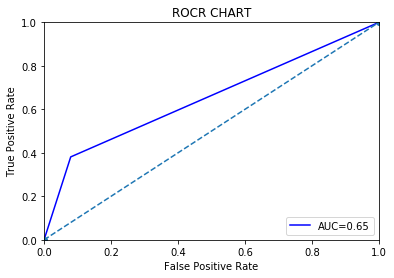

In [88]:
plt.title('ROCR CHART')
plt.plot(fpr,tpr,'b',label='AUC=%0.2f'%roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'o--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show

Confusion Matrix


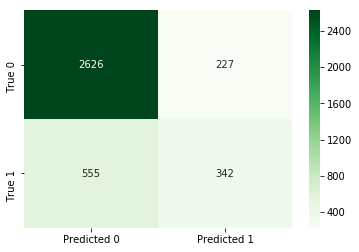

In [89]:
print("Confusion Matrix")
cf=metrics.confusion_matrix(test_y,classes)
lbl1=["Predicted 0","Predicted 1"]
lbl2=["True 0","True 1"]
sns.heatmap(cf,annot=True,cmap="Greens",fmt='d',xticklabels=lbl1,yticklabels=lbl2)
plt.show()